#  0.0 IMPORTS

In [1]:


import pandas as pd
!pip install inflection
import inflection
import math
import numpy as np

!pip install seaborn 

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt


from IPython.core.display import HTML 
from IPython.display import Image
import time

!pip install datetime

import datetime

# 0.1 HELPER FUNCTIONS

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 0.2 LOARDING DATA


In [4]:
df_sales=  pd.read_csv(r'C:\Users\Administrador.000\Google Drive\repositorio\DS Produção/train.csv',low_memory=False)

df_store = pd.read_csv(r'C:\Users\Administrador.000\Google Drive\repositorio\DS Produção/store.csv',low_memory=False)

df_mesclar = pd.merge(df_sales,df_store, how='left',on='Store' )



In [8]:
df_mesclar.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
40606,467,4,2015-06-25,10918,1433,1,0,0,0,a,c,20390.0,4.0,2008.0,0,NaN,NaN,NaN


#  1.0 DESCRIÇÃO DOS DADOS


In [5]:
df1 = df_mesclar.copy()

In [6]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1 Rename Columns

In [7]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snackcase= lambda x: inflection.underscore( x )

new_cols = list(map(snackcase,cols_old))

df1.columns = new_cols

display(new_cols)

['store',
 'day_of_week',
 'date',
 'sales',
 'customers',
 'open',
 'promo',
 'state_holiday',
 'school_holiday',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'promo_interval']

## 1.2 Data Dimension 

In [8]:
print('Number of Rows {}'.format(df1.shape[0]))
print('Number of Cols {}'.format(df1.shape[1]))

Number of Rows 1017209
Number of Cols 18


## 1.3 Data Types

In [9]:
df1['date'] =pd.to_datetime(df1['date'])

df1.dtypes




store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA


In [10]:
#total de dados faltantes dentro do arquivo
df1.isna().sum() 

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [11]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
275235,622,4,2014-11-20,3366,374,1,0,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN


In [12]:

print(df1['competition_open_since_month'].max())

12.0


In [13]:
#competition_distance (compentição em metros- isso quer dizer a distância de uma loja para outra- qual a diferença de vendas)
#nesse caso ele aparece "NA" ou seja, vazio, pois não há ou não considerado um competidor proxima dessa unidade
#2000.0 seria uma distancia hipotetica

df1['competition_distance']= df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x )

#pecorra todas as linhas da coluna(apply), onde está vazio subtistuir pelo valor 20000 (x=2000) caso contrário também colocar
#20000 (que igual a x)

#competition_open_since_month  
# data de abertura de uma outra loja.Quando ela foi aberta? Ele pega uma fatia de meu público. 
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)


#leitura = pecorra todas as linha dessa coluna(apply) e aonde está vazio preencha com x['date'].mês, caso contrário permance como
#a data que está lá, pois não está vazio

#competition_open_since_year
# pecorrer todas as linhas vazias e preenche com o ano
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)


#promo2_since_week 
# quero preencher as NA (colunas vazias por data da semana) O algaritismo vai preencher
df1['promo2_since_week']= df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'],axis=1)
                                    

#promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x:x['date'].year if math.isnan(x['promo2_since_year'])else x['promo2_since_year'],axis=1)
#promo_interval              

month_map = {1: 'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

df1['promo_interval'].fillna(0, inplace=True)

df1['month_map']= df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval','month_map']].apply(lambda x: 0 if x['promo_interval'] ==0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0,axis=1)



In [14]:
df1.isna().sum()



store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 CHANGE TYPES

In [15]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [16]:

# competition of store
# promo2 in fomart date
#transformation the types

df1['competition_distance']= df1['competition_distance'].astype('int64')
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')
df1['promo2_since_week'] = df1['promo2_since_week'].astype('int64')
df1['promo2_since_year'] = df1['promo2_since_year'].astype('int64')
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                     int64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

# 1.7 Descriptive Stastical


In [17]:
num_attributes = df1.select_dtypes(include=['int64','float64']) ## somente numeros
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]']) #somente strings



# 1.7.1 Numerical Attribute

In [18]:
# Central Tendency -mean and mediana

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# std = desvio padrão ; rangew= a diferença do máximo e do minimo;

# dispersion - std, min, max, range, skew,, kurtosis

d1 = pd.DataFrame( num_attributes.apply(np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max) ).T
d4 = pd.DataFrame( num_attributes.apply(lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply(lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply(lambda x: x.kurtosis () ) ).T

#concatenar

metricas = pd.concat([d1,d2,d3,d4,d5,d6,ct1,ct2]).T.reset_index()

##renomear as colunas
metricas.columns= ['attributes','desvio(std)','minimo','maximo','range','skew','kurtosis','mean','median']

metricas

,attributes,desvio(std),minimo,maximo,range,skew,kurtosis,mean,median
0,store,321.908493,1.0,1115.0,1114.0,-0.000955,-1.200524,558.429727,558.0
1,day_of_week,1.997390,1.0,7.0,6.0,0.001593,-1.246873,3.998341,4.0
2,sales,3849.924283,0.0,41551.0,41551.0,0.641460,1.778375,5773.818972,5744.0
3,customers,464.411506,0.0,7388.0,7388.0,1.598650,7.091773,633.145946,609.0
4,open,0.375539,0.0,1.0,1.0,-1.758045,1.090723,0.830107,1.0
5,promo,0.485758,0.0,1.0,1.0,0.487838,-1.762018,0.381515,0.0
6,school_holiday,0.383056,0.0,1.0,1.0,1.677842,0.815154,0.178647,0.0
7,competition_distance,12547.646829,20.0,200000.0,199980.0,10.242344,147.789712,5935.442677,2330.0
8,competition_open_since_month,3.311085,1.0,12.0,11.0,-0.042076,-1.232607,6.786849,7.0
9,competition_open_since_year,5.515591,1900.0,2015.0,115.0,-7.235657,124.071304,2010.324840,2012.0


C:\Users\Administrador.000\anaconda3\envs\DateScienteEmProducao\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


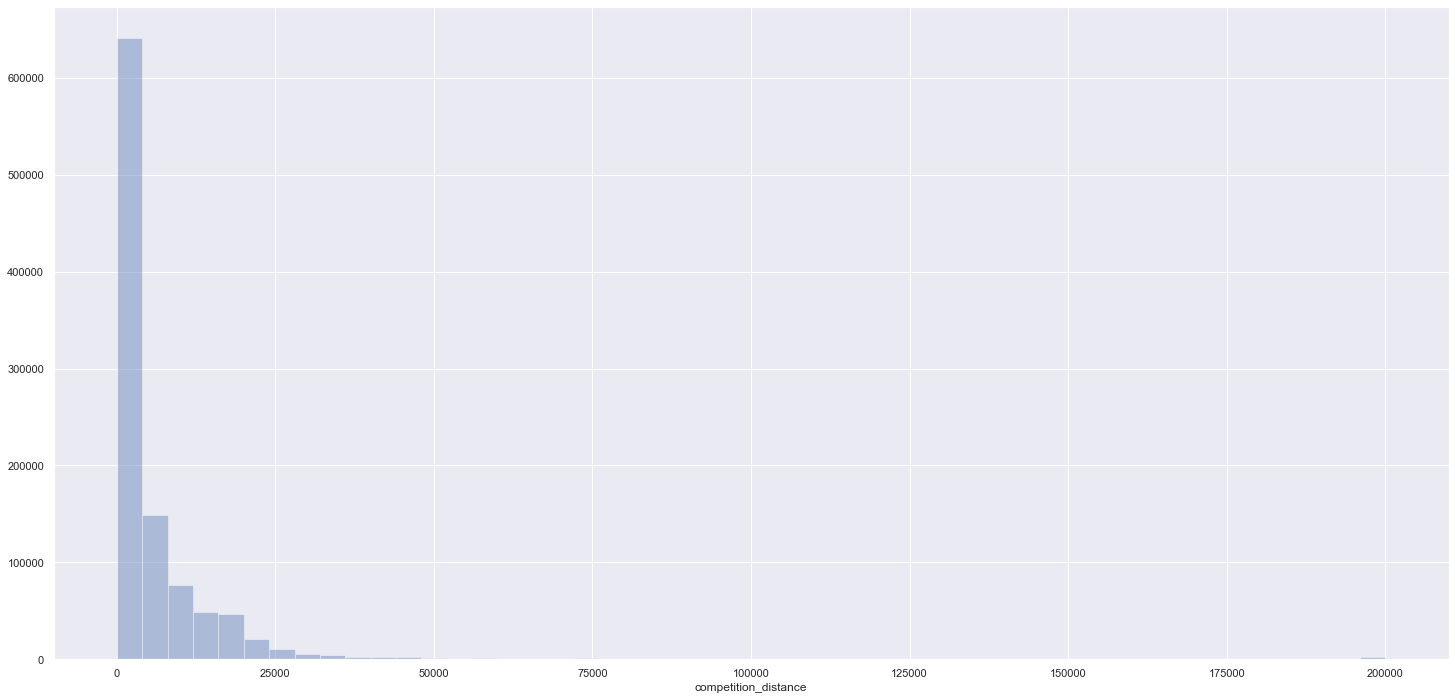

In [25]:
sns.distplot(df1['competition_distance'],kde=False);



## 1.7.2 Categorical Attribute

In [20]:
# unique = unico, ou seja ele pega todo mundo do DF1 ou de toda uma lista(como fosse uma soma)

# shape = forma: serve para vê todos os itens (somado) do DF ou da lista

cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

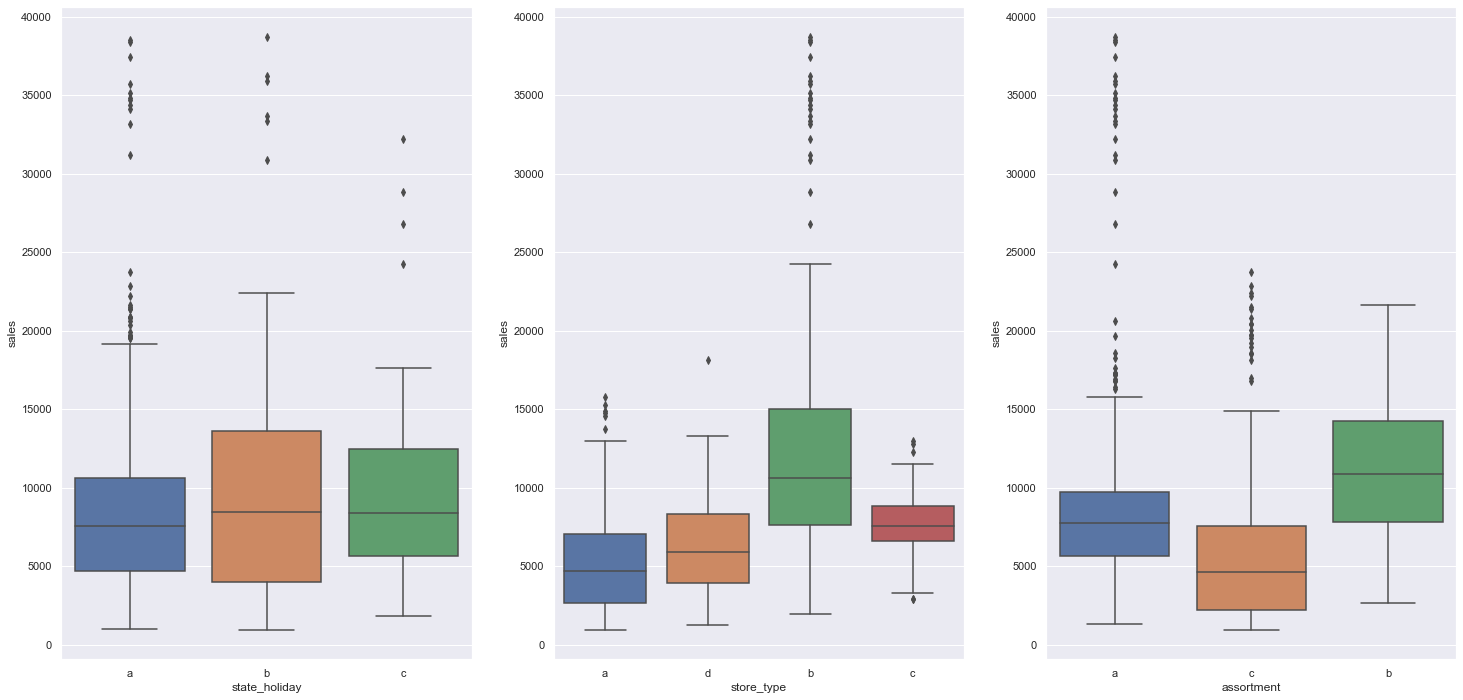

In [21]:
aux = df1[(df1['state_holiday'] != '0') & (df1['sales']> 0)]


plt.subplot(1,3,1)
sns.boxplot (x='state_holiday', y='sales',data=aux)
## no feriado b tem mais vendas do que no feriado A e C

plt.subplot(1,3,2)
sns.boxplot(x ='store_type',y='sales',data=aux)
#no tipo de loja, a loja b tem mais vendas que as demais lojas

plt.subplot(1,3,3)
sns.boxplot(x='assortment',y='sales',data=aux)



# 2.0 Passo 02- Feature Engineering

In [22]:
df2 = df1.copy()


#Converta a célula em markdown:

#pressionando M na célula selecionada OU Na barra de menus, Célula> Tipo de célula> Remarcação.
#( Observação: é importante converter a célula em Markdown, caso contrário, a opção "Inserir imagem" na etapa 2 não estará ativa)
#Agora vá para a barra de menus e selecione Editar -> Inserir imagem.

#Selecione a imagem do seu disco e faça o upload.

#Pressione Ctrl+ Enterou Shift+ Enter.

#Isso fará com que a imagem faça parte do caderno e você não precisará fazer o upload no diretório ou no Github. Sinto que isso parece mais limpo e não propenso a problemas de URL corrompidos.

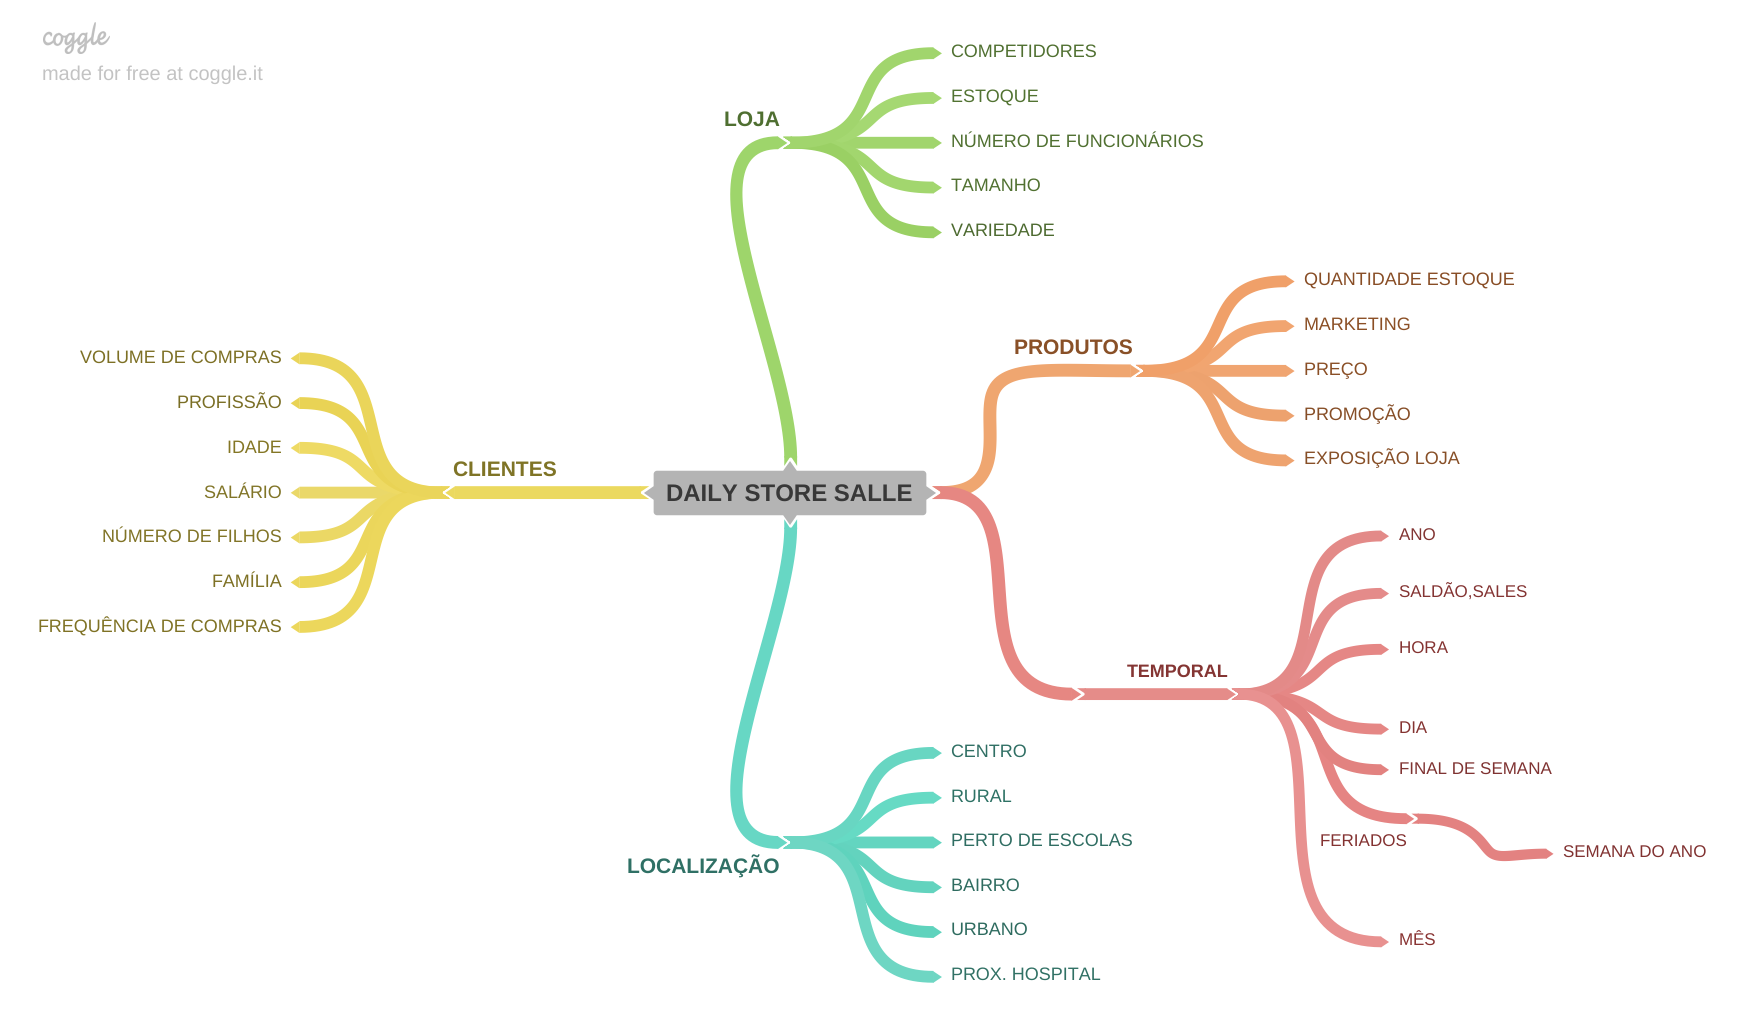


# 2.2 Criação das Hipóteses 

## 2.2.1. Hipótese Loja

**1.**  Lojas com número maior de fúncionários deveriam vender mais.

**2.**  Lojas com maior variedades de produtos deveriam vender mais.

**3.**  Lojas com maior porte deveriam vender mais.

**4.**  Lojas com maior capacidade de estoque deveriam vender mais.

**5.**  Lojas com competidores mais próximo deveriam venderiam mais.

**6.** Lojas com competidores à mais tempo deveriam vender mais.

## 2.2.2 Hipótese Produtos

**1.** Lojas que fazem mais ação de marketing deveriam vender mais.

**2.** Lojas com mais  exposição dos seus produtos deveriam vender mais.

**3.** Lojas que ativam promoções por mais tempo deveriam vender mais.

**4.** Lojas com promoções mais agressivas (descontos maiores) deveriam vender mais.

**5.** Lojas com mais de promoções deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais. 

**7.** Lojas que tem preços mais baixos deveriam vender mais. 

**8.** Lojas com mais produtos em estoque deveriam vender mais. 

## 2.23 Hipótese Temporal

**1.** Lojas abertas no feriaodo de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos. 

**3.** Lojas deveriam vender mais depois do dia 10 de cada mês. 

**4.** Lojas deveriam vender menos aos finais de semana. 

**5** Lojas deveriam vender mais no segundo semestre do ano.

**6.** Lojas deveriam vender menos nos feriaods escolares. 



# 2.3 Lista Final de Hipótese 

 **(essa lista eu considero os itens que eu tenho dados para fazer exploração dos dados)**


**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.

**8.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**9.** Lojas deveriam vender mais ao longo dos anos.

**10.** Lojas deveriam vender mais no segundo semestre do ano.

**11.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**12.** Lojas deveriam vender menos aos finais de semana.

**13.** Lojas deveriam vender menos durante os feriados escolares.


# 2.4 Feature Engineer

In [23]:
df2['year']= df2['date'].dt.year

df2['month']= df2['date'].dt.month

df2['day']= df2['date'].dt.day

df2['week_of_year']= df2['date'].dt.weekofyear

df2['year_week']= df2['date'].dt.strftime('%Y-%W') #coluna criada para formatar data como"ano e semana desse ano".

#competition_since

# somando as duas colunas de competition year e week para ter a media em dias. Para isso foi necessário conventer em datas.
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1 ), axis=1 )

##tempo de competição em meses. (subtraindo  coluna de datas com coluna competition_since que foi transformada tbm em data)
df2['competition_time_month']= ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype( int)

#promo_since

#primeiro deve transformar as duas colunas em strings para unir as datas
df2['promo_since']= df2['promo2_since_year'].astype( str) + '-' + df2['promo2_since_week'].astype( str )
# depois aplicar a formula lambda para transoformar string em datas para serem formatatos na mesma coluna(ano,semana,numero)
df2['promo_since']= df2['promo_since'].apply(lambda x: datetime.datetime.strptime( x + '-1','%Y-%W-%w') - datetime.timedelta(days=7))
# essa parte é como a dos meses. Para transformar as semana em dias (inteiros)
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype (int )

##assortment (a = basic, b = extra, c = extended) - objetvo aqui é mudar letras para descrição completa no DF.

# racicionio lamda: "argumento(x) if(se) x(argumento é igual a comparação(resultado))
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x== 'a' else 'extra' if x =='b'else 'extended')

#State_holiday a = public holiday, b = Easter holiday, c = Christmas, 0 = None

df2['state_holiday']= df2['state_holiday'].apply(lambda x: 'public_holiday' if x=='a' else 'easter_holiday' if x=='b' else 'christmas' if x=='c' else 'regular_day')


<ipython-input-23-6ea2e9401273>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year']= df2['date'].dt.weekofyear


In [24]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0 PASSO 03 - FILTRAGEM DE VÁRIAVEIS

In [25]:
df3 = df2.copy()
# nesse passo vamos excluir os dados irrelevantes para podemos explorar o que realmente é essencial
# então temos que analisar todos as possíveis restrições do projeto 

## 3.1 Filtragem de Linhas

In [26]:
#coluna open representa lojas abertaa, ou seja, loja aberta tenho venda, fehcado não. Então não tenha dado
# colunas "sales" são as vendas das unidades. Ou seja preciso de apenas vendas que são maiores que "0". tenha ao menos 1 venda


df3 = df3[(df3['open'] != 0) & (df3['sales'] >0)]


## 3.2 Seleção das Colunas

In [27]:
cols_drop= ['month_map','customers','promo_interval','open']

## fazendo dessa forma cria uma lista com as colunas que não há necessidade. 
#quando for remover com o método "x".drop (nome das colunas, a partir de qual) vai procurar e excluir as colunas com esses nomes


In [28]:
df3 = df3.drop(cols_drop, axis=1)

# 4.0 PASSO 04 - ANÁLISE DE EXPLORATORIO DOS DADOS

In [29]:
df4 = df3.copy()

## 4.1 Análise Univariada 
  ##### tem o objetivo de olhar unicamente a váraivel (se é uma max, min, média,mediana, range)

## 4.1.1 Responde Variable

C:\Users\Administrador.000\anaconda3\envs\DateScienteEmProducao\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


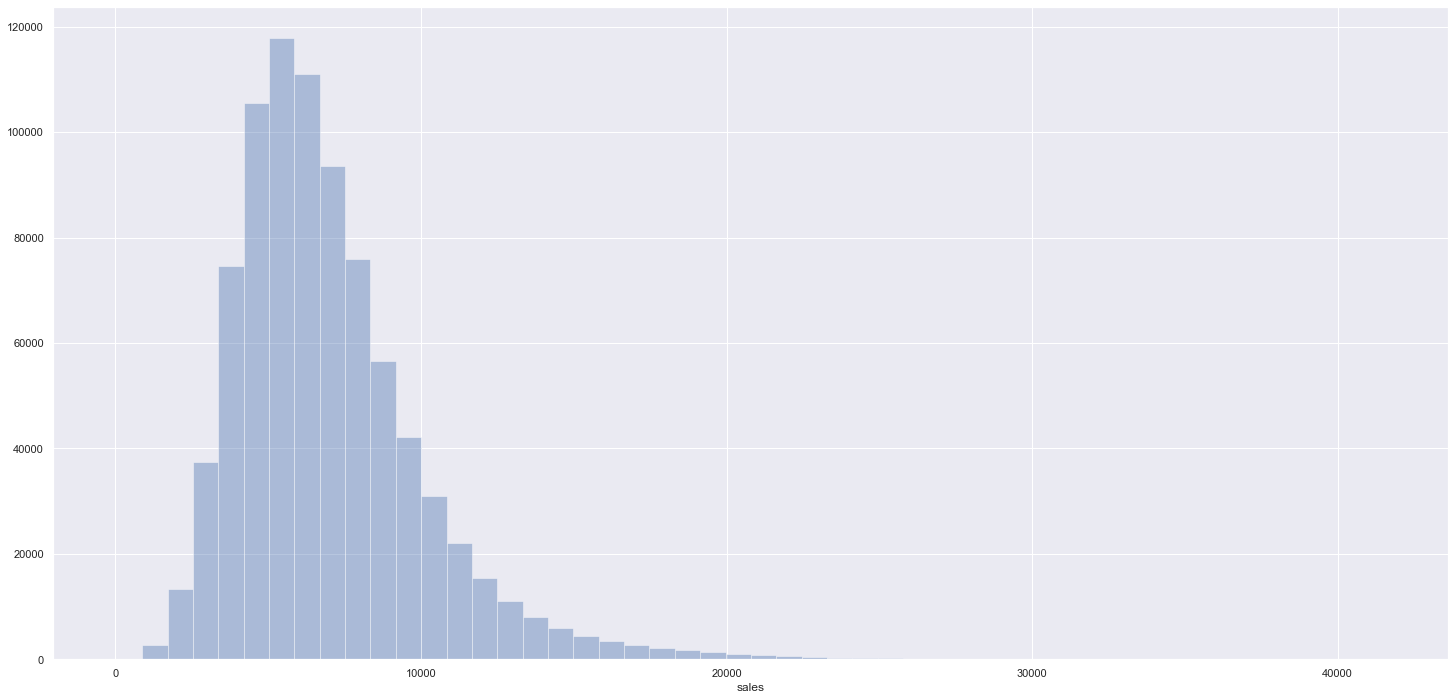

In [30]:
sns.distplot(df4['sales'], kde= False);

# explicação histograma https://ferramentasdaqualidade.org/histograma/

## 4.1.2 Numerical Variable

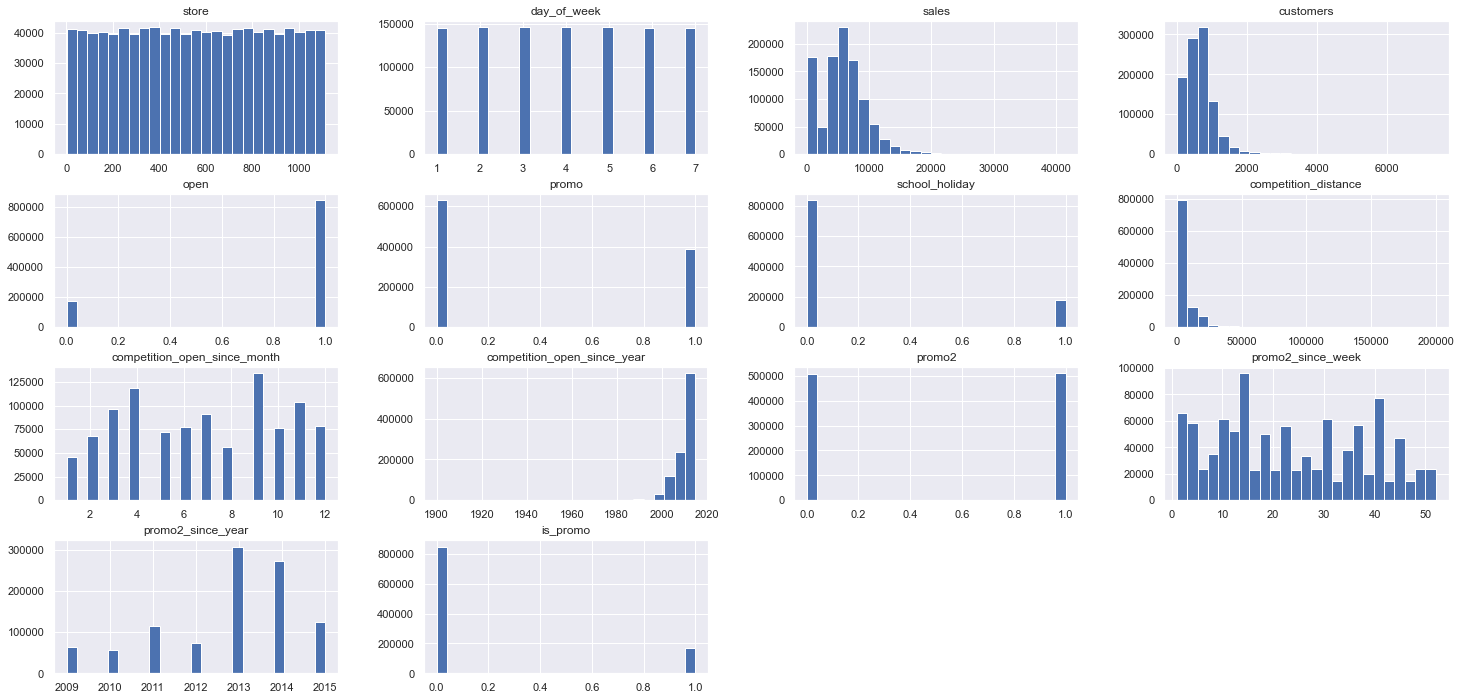

In [31]:
num_attributes.hist(bins=25);

## gráfico das váriavéis coletadas e tratadas anteriomente. 
#objetivo dessa parte é analisar as váriaveis e reparar diferenças e com isso gerar insight posteriores. Vê as correlações dos fenômenos
# Com isso poderá muitas das vezes são quebradas algumas crenças nas equipes das empresas, onde baseiavam-se no "achismo" das operações.


 ### análise em uma setença nos gráficos. 

1º gráfico - store: A média de lojas construidas ao longo do tempo são bem próximas. Não há uma diferença significativa

2º gráfico - day_of_week: A vendas das lojas indepedente do dia da semana são as mesmas. Não há nenhum pico de maior ou menor venda em dias diferentes.

3º gráfico - sales: Nesse gráfico é possível verificar que a quantidade de lojas existentes não corresponde a hipotése de venda, onde quanto mais lojas
mais vendas são efetuadas. 

4º gráfico - Customers: há um grande pico de clientes no começo das vendas, entre tanto, depois há um queda costante de entrada de clientes. Possívelmente
há alguma relação com abertura de lojas, onde há uma novidade e depois de um período tende a diminuir com normalidade. 

5 gráfico - Open : Quanto mais loja abertas maior a quantidade vendas. Ou seja, quanto mais próximo do 1 que representa uma loja aberta mais vendas tenho nesse evento. O inverso como esperado acontece quanto fica mais próximo do 0, menor a minha quantidade venda, pois a loja está fechada. 

6º gráfico - promo : Neste gráfico é possível verificar que é algo supreendente. Ele aponta que há um maior número de vendas quando não é feito promoção. 

7º gráfico - school holiday - Como era esperado a ausência de feriado escolar impacta em um maior número de vendas. Como apontado no gráfico, no frequencia 0. 

8º gráfico - competition_distance - Quanto mais competidores próximos eu tenho, mais eu tenho vendas. Como apontado no gráfico entre a relação de vendas e distância em metros.

9º gráfico - competition_since_month : referente abertura de lojas não há uma definição certa de acordo com o gráfico. Há uma aleotoriedade nas aberturas de lojas em relações as vendas. É uma gráfico de aletoriedade. 

10º gráfico - competition-since_year: observando o gráfico é possível indentificar que houve uma elevação constantante nas vendas a partir do anos 2000 com abertura de novas lojas. 

11º gráfico - promo2 : Nesse gráfico onde representa a continuidade dos competitores com as promoções feita anteriomente, aponta que há o mesmo nível de vendas entre os competidores. Ou seja, o prolongamento das promoções não representa um maior número de vendas. Ou seja há dois picos iguais (histograma com dos picos). 

12º gráfico - promo2_since_week: Neste gráfico há inúmeras variações de vendas ao decorrer das semanas. A continuação da promoções não seguem um padrão. Ou seja é um gráfico de histograma de aletoriedade. 

13º gráfico - promo2_since_year : é possível detectar que as continuaçãoes das promoções tiveram um melhor desempenho nos anos de 2013 e 2014. 

14º gráfico - is_promo: nesse gráfico onde simboliza se a uma loja está fazendo alguma promoção naquele dia, há outro dado no mínimo intrigante. Com esse gráfico é possível verificar que as lojas que estão fazendo uma promoção naquele dia (1) teve um número de vendas muito menor do que as lojas que não estavam fazendo no mesmo dia. 

In [34]:
metricas



,attributes,desvio(std),minimo,maximo,range,skew,kurtosis,mean,median
0,store,321.908493,1.0,1115.0,1114.0,-0.000955,-1.200524,558.429727,558.0
1,day_of_week,1.997390,1.0,7.0,6.0,0.001593,-1.246873,3.998341,4.0
2,sales,3849.924283,0.0,41551.0,41551.0,0.641460,1.778375,5773.818972,5744.0
3,customers,464.411506,0.0,7388.0,7388.0,1.598650,7.091773,633.145946,609.0
4,open,0.375539,0.0,1.0,1.0,-1.758045,1.090723,0.830107,1.0
5,promo,0.485758,0.0,1.0,1.0,0.487838,-1.762018,0.381515,0.0
6,school_holiday,0.383056,0.0,1.0,1.0,1.677842,0.815154,0.178647,0.0
7,competition_distance,12547.646829,20.0,200000.0,199980.0,10.242344,147.789712,5935.442677,2330.0
8,competition_open_since_month,3.311085,1.0,12.0,11.0,-0.042076,-1.232607,6.786849,7.0
9,competition_open_since_year,5.515591,1900.0,2015.0,115.0,-7.235657,124.071304,2010.324840,2012.0
